In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pulp
#for davis dataset 
#rabi=pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\Rabi_fertilizer_data_merged_dacnet_2009_2017_farmer_cost_davis_waer.csv")#davis data 
#for davis 
#kharif=pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\kharif_fertilizer_data_merged_dacnet_2009_2017_farmer_cost_davis_waer.csv")

#adding water in using hoestra data 
kharif=pd.read_csv(r"E:\crop_switchning\fig2\code_final\kharif_waterdemand.csv")
rabi=pd.read_csv(r"E:\crop_switchning\fig2\code_final\rabi_waterdemand.csv")
CoP= pd.read_csv(r"E:\crop_switchning\cost_of_production.csv")
bnf_applied= pd.read_csv(r"E:\crop_switchning\bnf\bnf_app.csv")

# Convert 'State' and 'Crop' column values to lowercase
CoP['State'] = CoP['State'].str.strip().str.lower()
CoP['Crop'] = CoP['Crop'].str.strip().str.lower()

# Now, the 'State' and 'Crop' columns in CoP DataFrame have all their values in lowercase
# Rename the columns in CoP to match kharif DataFrame for a consistent merge
CoP_renamed = CoP.rename(columns={"Crop": "crop", "State": "state", "CostofProduction_rs_Quintal": "Cost_of_Production_rs_Quintal"})

# Perform the merge
rabi = pd.merge(rabi, CoP_renamed, how='left', on=['state', 'Year', 'crop'])


In [14]:
import pandas as pd

# Sample data to illustrate the process. The actual data is not shown due to the format of the question.
# These dictionaries represent the mapping from atm['State'] to kharif['state'] based on the provided examples.
state_name_mapping = {
    'Andaman and Nicobar': 'andaman and nicobar',
    'Andhra Pradesh': 'andhra pradesh',
    'Arunachal Pradesh': 'arunachal pradesh',
    'Assam': 'assam',
    'Bihar': 'bihar',
    'Chandigarh': 'chandigarh',
    'Chhattisgarh': 'chhattisgarh',
    'Dadra and Nagar Haveli': 'dadra and nagar haveli',
    'Daman and Diu': 'the dadra and nagar haveli and daman and diu', # Assuming both to be mapped to the single entry in kharif
    'Delhi': 'delhi', # Not present in the provided kharif states list, but added for completeness
    'Goa': 'goa', # Not present in the provided list, but added for completeness
    'Gujarat': 'gujarat',
    'Haryana': 'haryana',
    'Himachal Pradesh': 'himachal pradesh',
    'Jammu and Kashmir': 'jammu and kashmir',
    'Jharkhand': 'jharkhand',
    'Karnataka': 'karnataka',
    'Kerala': 'kerala',
    'Lakshadweep': 'lakshadweep', # Not present, but added for completeness
    'Madhya Pradesh': 'madhya pradesh',
    'Maharashtra': 'maharashtra',
    'Manipur': 'manipur',
    'Meghalaya': 'meghalaya',
    'Mizoram': 'mizoram',
    'Nagaland': 'nagaland',
    'Orissa': 'odisha',
    'Puducherry': 'puducherry',
    'Punjab': 'punjab',
    'Rajasthan': 'rajasthan',
    'Sikkim': 'sikkim',
    'Tamil Nadu': 'tamil nadu',
    'Telangana': 'telangana',
    'Tripura': 'tripura',
    'Uttar Pradesh': 'uttar pradesh',
    'Uttaranchal': 'uttarakhand', # Mapped to 'uttarakhand' as per provided list
    'West Bengal': 'west bengal',
}

# Assume atm_df and kharif_df are the DataFrames for the 'atm' and 'kharif' datasets, respectively.
# This code will update the 'State' column in atm_df to match the 'state' values in kharif_df.

# Example atm_df DataFrame creation
# This is a placeholder and should be replaced with the actual atm DataFrame in practice.
atm_df= pd.read_csv(r"E:\crop_switchning\fig2\code_final\atmospheric_depo_isimip_2a.csv")   # kg/ha

# Update 'State' in atm_df to match 'state' in kharif_df using the mapping
atm_df['State'] = atm_df['State'].map(state_name_mapping)
# Renaming 'State' in atm_df to 'state' to match kharif_df column name for a consistent merge
atm_df.rename(columns={'State': 'state'}, inplace=True)
# Assuming kharif_df exists, the merge operation would look like this:
# merged_df = pd.merge(kharif_df, atm_df, left_on='state', right_on='State')

# Displaying the updated atm_df for verification
atm_df


# Performing the merge based on 'state' and 'Year'
rabi = pd.merge(rabi, atm_df, on=['state', 'Year'], how='left')
rabi = pd.merge(rabi, bnf_applied, on=[ 'Year'], how='left')


In [15]:
#coeff from image mmodel 
import pandas as pd 
image_coeff= pd.read_csv(r"E:\network restructurong\trial_analysis\image_coeff.csv")
image_coeff.rename(columns={'fN2O[% of Nsurplus]': 'fn2o', 'fNO3_leaching_to_GW[% of Nsurplus]': 'fno3'}, inplace=True)
image_coeff['State'] = image_coeff['State'].str.lower().str.strip()
image_coeff.rename(columns={'fN2O[% of Nsurplus]': 'fn2o', 'fNO3_leaching_to_GW[% of Nsurplus]': 'fno3'}, inplace=True)
image_coeff['fn2o'] = image_coeff['fn2o'] / 100    # as the value provided is in percentage 
image_coeff['fno3'] = image_coeff['fno3'] / 100

#image_coeff.rename(columns={'State':'state'}, inplace=True)
# Create a mapping dictionary from the abbreviated state names to the full state names
state_mapping = {
     'the dadra and nagar haveli and daman and diu':'dadra and nagar haveli',
    'andaman and nicobar islands':'andaman and nicobar'
}

# Use the 'replace' method to update the 'State' column in cwc_crop
image_coeff['State'] = image_coeff['State'].replace(state_mapping)
image_coeff.rename(columns={'State': 'state'}, inplace=True)

rabi = pd.merge(rabi, image_coeff, on=[ 'state'], how='left')


In [16]:

del kharif['Unnamed: 0']
del rabi['Unnamed: 0']
#manure nitrogen and P 
kharif['Manure (N_kg/ha)']=kharif['Manure (kg/ha)']*.005   #  https://agritech.tnau.ac.in/org_farm/orgfarm_manure.html
kharif['Manure (P_kg/ha)']=kharif['Manure (kg/ha)']*.002

rabi['Manure (N_kg/ha)']=rabi['Manure (kg/ha)']*.005
rabi['Manure (P_kg/ha)']=rabi['Manure (kg/ha)']*.002
#decadal scale maximum area  in of a rabi crop in a district 
rabi_max=pd.read_csv(r"E:\network restructurong\data_set_new\crop\rabi_max.csv")


# Ensure columns are numeric
rabi['N_applied(kg/ha)'] = pd.to_numeric(rabi['N_applied(kg/ha)'], errors='coerce')
rabi['Manure (N_kg/ha)'] = pd.to_numeric(rabi['Manure (N_kg/ha)'], errors='coerce')
rabi['P_applied(kg/ha)'] = pd.to_numeric(rabi['P_applied(kg/ha)'], errors='coerce')
rabi['Manure (P_kg/ha)'] = pd.to_numeric(rabi['Manure (P_kg/ha)'], errors='coerce')
rabi['Manure (N_kg/ha)'] = pd.to_numeric(rabi['Manure (N_kg/ha)'], errors='coerce')
rabi['CWR m3/ha'] = pd.to_numeric(rabi['CWR m3/ha'], errors='coerce')
rabi['CWU green m3/ha'] = pd.to_numeric(rabi['CWU green m3/ha'], errors='coerce')
rabi['CWU blue m3/ha'] = pd.to_numeric(rabi['CWU blue m3/ha'], errors='coerce')
# Replace 0 with np.nan using np.where
rabi['N_applied(kg/ha)'] = np.where(rabi['N_applied(kg/ha)'] == 0, np.nan, rabi['N_applied(kg/ha)'])
rabi['Manure (N_kg/ha)'] = np.where(rabi['Manure (N_kg/ha)'] == 0, np.nan, rabi['Manure (N_kg/ha)'])
rabi['P_applied(kg/ha)'] = np.where(rabi['P_applied(kg/ha)'] == 0, np.nan, rabi['P_applied(kg/ha)'])
rabi['Manure (P_kg/ha)'] = np.where(rabi['Manure (P_kg/ha)'] == 0, np.nan, rabi['Manure (P_kg/ha)'])
rabi['CWR m3/ha']  = np.where(rabi['CWR m3/ha'] == 0, np.nan, rabi['CWR m3/ha'])
rabi['CWU green m3/ha'] = np.where(rabi['CWU green m3/ha'] == 0, np.nan, rabi['CWU green m3/ha'])
rabi['CWU blue m3/ha'] = np.where(rabi['CWU blue m3/ha'] == 0, np.nan, rabi['CWU blue m3/ha'])

#calculating n app rate 
#calculating n app rate 
#kharif['net_N_applied(kg/ha)']=kharif['N_applied(kg/ha)']+kharif['Manure (N_kg/ha)'] + kharif['atm_depo'] +kharif['BNF_kg_per_hec'] 

#kharif['net_P_applied(kg/ha)']=kharif['P_applied(kg/ha)']+kharif['Manure (P_kg/ha)'] 

#calculating n app rate 
rabi['net_N_applied(kg/ha)']=rabi['N_applied(kg/ha)']+rabi['Manure (N_kg/ha)'] + rabi['atm_depo'] +rabi['BNF_kg_per_hec'] 
rabi['net_P_applied(kg/ha)']=rabi['P_applied(kg/ha)']+rabi['Manure (P_kg/ha)']


In [17]:
# Selecting the columns needed for the calculation
columns_of_interest = [
    'state', 'district', 'crop', 'N_applied(kg/ha)', 'P_applied(kg/ha)', 
    'K_applied(kg/ha)', 'Manure (kg/ha)', 'calorie_per_100g', 'MSP_RsperQntl', 
    'CostofCultivation_rs_ha','CWR m3/ha', 'CWR_y', 'CWU green_y', 'CWU blue_y','CWR m3/ha',	'CWU green m3/ha',	'CWU blue m3/ha'
]

# Replacing infinite values with NaNs in these columns
for col in columns_of_interest:
    rabi[col].replace([float('inf'), float('-inf')], pd.NA, inplace=True)

In [18]:
#takeb from https://link.springer.com/article/10.1007/bf03187117    
#Surface N balances and reactive N loss to the environment from global intensive agricultural production systems for the period 1970–2030

# Define the nitrogen content dictionary (as provided previously)  # value in kg per kg product
#crop_nitrogen_content = {
#    'rice': .013,
#   'wheat': .019,
#    'jowar': .015,
#    'bajra': .015,
#    'maize': .014,
#    'ragi': .015,
#    'barley': .017
#}
#https://www.fao.org/faostat/en/#data/ESB
crop_nitrogen_content = {
    'rice': .0129,
    'jowar': .0146,   # SORGHUM
    'bajra': .0204,
    'maize': .0124,
    'ragi': .0204
    ,'wheat':.0209
    #,'barley':.018
}
# Create the n_removed column by multiplying PRODUCTION (kg) by nitrogen content
rabi['n_removed_rate'] = rabi.apply(lambda row:crop_nitrogen_content.get(row['crop'], 0), axis=1)

crop_phosphorous_content = {
    'rice': .0028,
    'jowar': .0045,   # SORGHUM
    'bajra': .0042,
    'maize': .0034,
    'ragi': .0042
    ,'wheat':.0042
   # ,'barley':.0032
    
}
# Create the n_removed column by multiplying PRODUCTION (kg) by nitrogen content
rabi['n_removed_rate'] = rabi.apply(lambda row:crop_nitrogen_content.get(row['crop'], 0), axis=1)

# Create the p_removed column by multiplying PRODUCTION (kg) by nitrogen content
rabi['p_removed_rate'] = rabi.apply(lambda row:crop_phosphorous_content.get(row['crop'], 0), axis=1)



In [19]:
#getting year specific data 
rabi_2017 = rabi[rabi['Year'].isin([2017])]
# Calculate the crop-specific average values for each nutrient
avg_nutrients = rabi_2017.groupby('crop')[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].transform('mean')

# Fill NaN values in kharif with the crop-specific average values
rabi_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']] = rabi_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].fillna(avg_nutrients)

avg_wat=rabi_2017.groupby(['state','crop'])[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']].transform('mean')
rabi_2017[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']] = rabi_2017[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']].fillna(avg_wat)


C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\3859357323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']] = rabi_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].fillna(avg_nutrients)
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\3859357323.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017[['CWR m

In [20]:
# Assuming rabi_2017 is your DataFrame
rabi_2017['Manure (N_kg/ha)'].fillna(0, inplace=True)
rabi_2017['Manure (P_kg/ha)'].fillna(0, inplace=True)

C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\2949772799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017['Manure (N_kg/ha)'].fillna(0, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\2949772799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017['Manure (P_kg/ha)'].fillna(0, inplace=True)


In [21]:
#calculating n app rate 
#calculating n app rate 
rabi_2017['net_N_applied(kg/ha)']=rabi_2017['N_applied(kg/ha)']+rabi_2017['Manure (N_kg/ha)'] + rabi_2017['atm_depo'] +rabi_2017['BNF_kg_per_hec'] 
rabi_2017['net_P_applied(kg/ha)']=rabi_2017['P_applied(kg/ha)']+rabi_2017['Manure (P_kg/ha)']


C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\2943216237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017['net_N_applied(kg/ha)']=rabi_2017['N_applied(kg/ha)']+rabi_2017['Manure (N_kg/ha)'] + rabi_2017['atm_depo'] +rabi_2017['BNF_kg_per_hec']
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\2943216237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017['net_P_applied(kg/ha)']=rabi_2017['P_applied(kg/ha)']+rabi_2017['Manure (P_kg/ha)']


In [22]:
#finding historical area 
# Grouping the data by state, district, and crop and summing the area
historical_cereal_area = rabi.groupby(['state', 'district', 'crop'])['Area (Hectare)'].mean()

# Convert the grouped data to a dictionary
historical_cereal_area_dict = historical_cereal_area.to_dict()

In [23]:
#historiccally maximum area 
# Grouping the data by state and district and summing the area to find the maximum historical area
total_historical_area_district = rabi.groupby(['state', 'district','Year'])['Area (Hectare)'].sum()
max_historical_area_district = rabi.groupby(['state', 'district'])['Area (Hectare)'].mean()

# Convert the grouped data to a dictionary
max_historical_area_district_dict = max_historical_area_district.to_dict()

# Display the first few elements of the dictionary to verify
list(max_historical_area_district_dict.items())[:5]


[(('andaman and nicobar', 'nicobars'), 3.728),
 (('andaman and nicobar', 'north and middle andaman'), 59.58200000000001),
 (('andaman and nicobar', 'south andamans'), 44.492000000000004),
 (('andhra pradesh', 'adilabad'), 9256.736842105263),
 (('andhra pradesh', 'anantapur'), 4664.706896551724)]

In [24]:
df = rabi_2017
#del df['Unnamed: 0']
# Renaming the column
df.rename(columns={'district': 'District'}, inplace=True)
df.rename(columns={'state': 'State'}, inplace=True)
df.rename(columns={'crop': 'Crop'}, inplace=True)


#finding maximum area 
rabi_max.rename(columns={'district': 'District'}, inplace=True)
rabi_max.rename(columns={'state': 'State'}, inplace=True)
rabi_max.rename(columns={'crop': 'Crop'}, inplace=True)
rabi_max['Crop'] = rabi_max['Crop'].str.lower().str.strip()




 #  only rabi crop 
# Step 1: Filter the DataFrame
selected_crops = ['bajra', 'jowar', 'ragi', 'rice'
                  ,'maize','wheat'
                  ]
df = df[df['Crop'].isin(selected_crops)]
rabi_max = rabi_max[rabi_max['Crop'].isin(selected_crops)]


# Step 2: Create a dictionary for maximum area constraints
max_area_constraints = rabi_max.set_index(['State','District', 'Crop'])['Area (Hectare)'].to_dict()

# Convert to lowercase and strip whitespace
df['District'] = df['District'].str.lower().str.strip()
df['State'] = df['State'].str.lower().str.strip()
df['Crop'] = df['Crop'].str.lower().str.strip()

#fillin nan value in applied n with national avg 
#filling the nan values in the n application rate with state and crop avg value 
# Compute the average for 'N_applied(kg/ha)' grouped by 'State' and 'Crop'
avg_N_applied = df.groupby(['Crop'])['net_N_applied(kg/ha)'].transform('mean')
global_avg=rabi.groupby(['crop'])['net_N_applied(kg/ha)'].transform('mean')
# Replace NaN values in 'net_N_applied(kg/ha)' with the computed average
df['net_N_applied(kg/ha)'].fillna(avg_N_applied, inplace=True)
if df['net_N_applied(kg/ha)'].isnull().any():
    df['net_N_applied(kg/ha)'].fillna(global_avg, inplace=True)  # Fallback to global average if needed

#fillin nan value in applied p with national avg 
avg_P_applied = df.groupby(['Crop'])['net_P_applied(kg/ha)'].transform('mean')
global_avg_P=rabi.groupby(['crop'])['net_P_applied(kg/ha)'].transform('mean')
# Replace NaN values in 'net_P_applied(kg/ha)' with the computed average
df['net_P_applied(kg/ha)'].fillna(avg_P_applied, inplace=True)
if df['net_P_applied(kg/ha)'].isnull().any():
    df['net_P_applied(kg/ha)'].fillna(global_avg_P, inplace=True)  # Fallback to global average if needed


#filling cost of cultivattion with avg vallue 
# Step 1
avg_cost_cult = df.groupby('Crop')['CostofCultivation_rs_ha'].transform('mean')

# Step 2
df['CostofCultivation_rs_ha'].fillna(avg_cost_cult, inplace=True)

# Step 3
if df['CostofCultivation_rs_ha'].isnull().any():
    print("NaN values present after local crop average fill")

    # Step 4
    global_avg_cost_cult = rabi.groupby('crop')['CostofCultivation_rs_ha'].transform('mean')

    # Step 5
    df['CostofCultivation_rs_ha'].fillna(global_avg_cost_cult, inplace=True)

# Step 6
if df['CostofCultivation_rs_ha'].isnull().any():
    print("NaN values present after global average fill")
else:
    print("All NaN values filled")
    
# replace all occurrences of -1 in the 'AREA (1000 ha)' and 'PRODUCTION (1000 tons)' columns with zero   which signifies missing values 
df['Area (Hectare)'] = df['Area (Hectare)'].replace(-1, 0)
df['Production (Tonnes)'] = df['Production (Tonnes)'].replace(-1, 0)
df['YIELD (Kg per ha)'] = 1000*df['Yield (Tonnes/Hectare)'].replace(-1, 0)
#compute avg water requiremment 
avg_applied_CWR = df.groupby(['Crop'])['CWR m3/ha'].transform('mean')
global_avg_cwr=rabi.groupby(['crop'])['CWR m3/ha'].transform('mean')
# Replace NaN values in 'CWR m3/ha' with the computed average
df['CWR m3/ha'].fillna(avg_applied_CWR, inplace=True)
if df['CWR m3/ha'].isnull().any():
    df['CWR m3/ha'].fillna(global_avg_cwr, inplace=True)  # Fallback to global average if needed

df['CWR m3/ha'] = df['CWR m3/ha'].fillna(0)

#setting yield 
yield_data = df.set_index(['State','District', 'Crop'])['YIELD (Kg per ha)'].to_dict()

# Calorie data (converted to per tonne)  
# in kcal 
#calorie_per_100g = {
    #'ragi': 328,
    #'bajra': 361,
    #'rice': 345,
    #'jowar': 349,
    #'wheat': 346,
    #'maize': 342
    #,'barley': 352
#}
calorie_per_100g = {
    'ragi': 321,
    'bajra': 348,
    'rice': 356,
    'jowar': 334,
    'wheat': 322
    ,'maize': 342
    #,'barley': 352
}
#calorie_per_tonne = {cereal: value * 10000 for cereal, value in calorie_per_100g.items()}   # in 1000TONNE   chnage  calorie_per_tonneto  calorie_per_kg
calorie_per_kg = {cereal: value * 10 for cereal, value in calorie_per_100g.items()}   # in kg   chnage  calorie_per_tonneto  calorie_per_kg


#aghg Per-Area Total (Mg CO2e ha-1) 2017
# Dictionary mapping crop names to their corresponding values   
crop_co2e = { 
    'bajra': 0.098603856,
    'ragi': 0.098603856,
    'rice': 8.213913103,
    'jowar': 0.154967254,
    'wheat': 0.729809876,
    'maize': 0.889859651
}

AGHG_per_ha = {cereal: value for cereal, value in crop_co2e.items()}   # in (Mg CO2e ha-1)





# Calculate Total Calorie Supply for Each District-Cereal Combination
#df['Calorie Supply (per tonne)'] = df['Crop'].map(calorie_per_tonne)
df['Calorie Supply (per KG)'] = df['Crop'].map(calorie_per_kg)   # crop wise calorie mapping
#total aghg produced in india 
df['AGHG_produced (per ha)'] = df['Crop'].map(AGHG_per_ha)   # crop wise aghg mapping (Mg CO2e ha-1) 2017



df['Total Calorie Supply'] =1000*df['Production (Tonnes)'] * df['Calorie Supply (per KG)']   # IN KG
df['Total Farmer Cost'] = 10*df['Production (Tonnes)'] * df['Cost_of_Production_rs_Quintal']  # as area is in 1000ha    



# MSP data for various crops
msp_quintal = {
    'barley': 1410,
    'wheat': 1735,
    'rice': 1570,
    'jowar': 1712.5,
    'bajra': 1425,
    'maize': 1425,
    'ragi': 1900
}

# Create a dictionary mapping crop to its MSP per quintal
msp_per_quintal = {cereal: value for cereal, value in msp_quintal.items()}
df['MSP_RsperQntl'] = df['Crop'].map(msp_per_quintal)   # crop wise calorie mapping  # (In Rs. per Quintal)



#calculate total selling price for each district-cereal combination
#data['MSP Supply (per tonne)'] = data['Crop'].map(msp_per_tonne)
df['Total MSP Supply'] = 10*df['Production (Tonnes)'] * df['MSP_RsperQntl']  # tonne to qut factor is 10 10000 to convert 1000ton
df['Total initial profit']=df['Total MSP Supply'] - df['Total Farmer Cost']
#data.head(4)

# Extract Data into Dictionaries
districts = df['District'].unique().tolist()
states = df['State'].unique().tolist()
cereals = df['Crop'].unique().tolist()


#current_area = df.set_index('District')['AREA (1000 ha)'].to_dict()  # this was wrong as it was giving only last district area 
current_area = df.groupby(['State','District'])['Area (Hectare)'].sum().to_dict() # this gives sum of all the area of all crops in the district

#nitrogen_rate = data.groupby('Crop')['N_applied(kg/ha)'].mean().to_dict()   #need to change 
#in this synthetic + manure + atm+bnf applied value is to be used   application rate 
nitrogen_rate = df.set_index(['State','District', 'Crop'])['net_N_applied(kg/ha)'].to_dict()
nitrogen_removal_rate_perkg=  df.set_index(['State','District', 'Crop'])['n_removed_rate'].to_dict()
#NITROGEN LEACH 
nitrogen_leach_rate_perkg=df.set_index(['State','District', 'Crop'])['fno3'].to_dict()   # this is to be multipkied by the surplus value that we are getting for each disstrict as we are assuming the leaching is same 
#nitrogen emission 
nitrogen_emission_rate_perkg=df.set_index(['State','District', 'Crop'])['fn2o'].to_dict()
#AGHG_rate                                       #Mg CO2e ha-1
#phosphorous_rate = data.groupby('Crop')['N_applied(kg/ha)'].mean().to_dict()   #need to change 
#in this synthetic + manure + atm+bnf applied value is to be used   application rate 
P_rate = df.set_index(['State','District', 'Crop'])['net_P_applied(kg/ha)'].to_dict()
P_removal_rate_perkg=  df.set_index(['State','District', 'Crop'])['p_removed_rate'].to_dict()

#water requirement 
water_rate = df.set_index(['State','District', 'Crop'])['CWR m3/ha'].to_dict()

#calories_per_area = data.set_index(['District', 'Crop'])['Calorie Supply (per tonne)'].to_dict()   # need tocheck as it should be calorie per unit production
calories_per_prod = df.set_index(['State','District', 'Crop'])['Calorie Supply (per KG)'].to_dict()   # this is to be multiplieed by the production value 
#aghg
AGHG_per_ha = df.set_index(['State','District', 'Crop'])['AGHG_produced (per ha)'].to_dict()   # this is to be multiplieed by the area  # crop wise aghg mapping (Mg CO2e ha-1) 2017 

district_to_state = df.set_index('District')['State'].to_dict()

cost_per_area = df.set_index(['State','District', 'Crop'])['Cost_of_Production_rs_Quintal'].to_dict()   # in ha   # cosyt of cultivation

MSP_per_prod = df.set_index(['State','District', 'Crop'])['MSP_RsperQntl'].to_dict()   # in quintal
current_cereal_area = {}
for index, row in df.iterrows():
    current_cereal_area[row['State'],row['District'], row['Crop']] = row['Area (Hectare)']    # in ha

current_cereal_prod = {}
for index, row in df.iterrows():
    current_cereal_prod[row['State'],row['District'], row['Crop']] = row['Production (Tonnes)']


#current applied nitrogen value 
original_nitrogen_values = [current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print(original_nitrogen_values)  # This will give the individual nitrogen applications for each district-cereal combo
original_N_surplus_value=[(current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0))  for s in states for d in districts for c in cereals]
#total n applied 
original_total_nitrogen = sum(original_nitrogen_values) # nitrogen applied 
original_N_surplus=  sum(original_N_surplus_value)  # surplus kg
#nitrogen leach 
origina_N_leach_value=[nitrogen_leach_rate_perkg.get((s,d, c), 0)*((current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0)))  for s in states for d in districts for c in cereals]
original_N_leach=  sum(origina_N_leach_value)  # leach kg

original_N_emission_value= [nitrogen_emission_rate_perkg.get((s,d, c), 0)*((current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0)))  for s in states for d in districts for c in cereals]
original_N_emission=  sum(original_N_emission_value)  # leach kg
print("Original Total Nitrogen Applied kg:", original_total_nitrogen)
print("Original Total Nitrogen Surplus generated kg:", original_N_surplus)
print("Original Total Nitrogen leach generated kg:", original_N_leach)
print("Original Total Nitrogen emission generated kg:", original_N_emission)


#current applied phosphorous value 
original_P_values = [current_cereal_area.get((s,d, c), 0) * P_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print(original_p_values)  # This will give the individual p applications for each district-cereal combo
original_P_surplus_value=[(current_cereal_area.get((s,d, c), 0) * P_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*P_removal_rate_perkg.get((s,d, c), 0))  for s in states for d in districts for c in cereals]
#total p applied 
original_total_P = sum(original_P_values) # nitrogen applied 
original_P_surplus=  sum(original_P_surplus_value)  # surplus kg

print("Original Total phosphorus Applied kg:", original_total_P)
print("Original Total phosphorus Surplus generated kg:", original_P_surplus)


#originall water required
original_water_values = [current_cereal_area.get((s,d, c), 0) * water_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print total water required 
#total n applied 
original_total_water = sum(original_water_values)
print("Original Total water Applied:", original_total_water)
prob = pulp.LpProblem("OptimizeCerealArea", pulp.LpMinimize)
    # Decision Variables
x = pulp.LpVariable.dicts("Area (Hectare)", (states,districts,cereals), 0, None, pulp.LpContinuous)  # this is in ha
# Objective Function - Adjusted to use district & crop specific nitrogen rates
#for n applied 
#prob += pulp.lpSum([x[s][d][c]* nitrogen_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals])  # as area is in ha
#fornsurplus
#prob += pulp.lpSum([x[s][d][c]*(nitrogen_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0) * nitrogen_removal_rate_perkg.get((s, d, c), 0))) for s in states for d in districts for c in cereals])   # for minimizing n surplus
#for p surplus 
#prob += pulp.lpSum([x[s][d][c]*(P_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0) * P_removal_rate_perkg.get((s, d, c), 0))) for s in states for d in districts for c in cereals])   # for minimizing n surplus
#minimizing water demand 
prob += pulp.lpSum([x[s][d][c]* water_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals])  # as area is in ha

#print(prob)
# Constraints
# Cropped Area Constraints    net area in the district within a state should remain same 
for s in states:
    for d in districts:
        prob += pulp.lpSum([x[s][d][c] for c in cereals]) == current_area.get((s,d), 0)

# adding historical area as a contrain where maximum achivable area is that od historically present 

# Step 3: Add the new constraints to your model
for s in states:
    for d in districts:
        for c in cereals:
            if c in max_area_constraints:
                prob += x[s][d][c] <= max_area_constraints[c]

# Existing Cereal Constraints   
# Replacement should happen when only crop is present 
#for s in states:
#    for d in districts:
#        for c in cereals:
#            if current_cereal_area.get((s,d,c), 0) == 0:
#                prob += x[s][d][c] == 0
#The constraint x[s][d][c] == 0: This is forcing the decision variable to be zero if the specific cereal was not originally planted in that district of that state, essentially saying 
#"if we didn't plant this cereal here before, we're not going to start now."


#instead of this we have to use historically present area 
for s in states:
    for d in districts:
        for c in cereals:
            if historical_cereal_area.get((s, d, c), 0) == 0:
                prob += x[s][d][c] == 0



# State Calorie Supply Constraints - State-wise calorie generated should remain the same
initial_state_calories = df.groupby('State')['Total Calorie Supply'].sum().to_dict()
for s in states:
    prob += pulp.lpSum(
        [x[s][d][c] * yield_data.get((s, d, c), 0) * calories_per_prod.get((s, d, c), 0) 
         for d in districts for c in cereals]
    ) >= initial_state_calories[s]


# Adding  farmers msp selling profit  Constraint
#initial_state_msp = df.groupby('State')['Total MSP Supply'].sum().to_dict()    # this is cost of cultivation of crop #
#for s in states:
#    prob += pulp.lpSum([x[s][d][c]*0.01*yield_data.get((s, d, c), 0)* MSP_per_prod.get((s,d, c), 0) for d in districts if district_to_state.get(d) == s for c in cereals]) >= initial_state_msp[s]


# Adding  Farmer Cost of production  Constraint
#initial_state_costs = df.groupby('State')['Total Farmer Cost'].sum().to_dict()    # this is cost of cultivation of crop 
#for s in states:
#   prob += pulp.lpSum([x[s][d][c]*0.01*yield_data.get((s, d, c), 0)* cost_per_area.get((s,d, c), 0) for d in districts if district_to_state.get(d) == s for c in cereals]) <= initial_state_costs[s]

# Adding  Farmer profit of production  Constraint
#df['Total initial profit']
#initial_state_profit = df.groupby('State')['Total initial profit'].sum().to_dict()    # this is cost of cultivation of crop 
#for s in states:
#    prob += pulp.lpSum([(x[s][d][c]* yield_data.get((s, d, c), 0)* 0.01*(MSP_per_prod.get((s,d, c), 0)- cost_per_area.get((s,d, c), 0))) for d in districts if district_to_state.get(d) == s for c in cereals]) >= initial_state_profit[s]
#initial_state_profit = df.groupby('State')['Total initial profit'].sum().to_dict()
#for s in states:
#    prob += pulp.lpSum(
#        [x[s][d][c] * yield_data.get((s, d, c), 0)*0.1 * (MSP_per_prod.get((s, d, c), 0) - cost_per_area.get((s,d, c), 0))
#         for d in districts for c in cereals]) >= initial_state_profit[s]


#adding constrain that original maize should not increase 
#initial_maize_area_by_state = df[df['Crop'] == 'maize'].groupby('State')['Area (Hectare)'].sum().to_dict()

#for s in states:
#    prob += pulp.lpSum([x[s][d]['maize'] for d in districts if district_to_state.get(d) == s]) == initial_maize_area_by_state.get(s, 0)

  

# Set the path for glpsol in GLPK_CMD
solver = pulp.GLPK_CMD(path=r"C:\Users\\shekh\\anaconda3\\envs\\opt_agri\\Library\\bin\\glpsol.exe")
#"C:\Users\shekh\anaconda3\envs\opt_agri\Library\bin\glpsol.exe"
#solver = pulp.GLPK_CMD()
#solver = pulp.GLPK_CMD()
prob.solve(solver)

#optimized_total_nitrogen = pulp.value(prob.objective)
#optimal_water_saving = pulp.value(prob.objective)

#print("optimized_total_nitrogen", optimized_total_nitrogen)
#print("optimized_total_water", optimal_water_saving)

print("Status:", pulp.LpStatus[prob.status])
#percentage change
#percentage_change_w = ((original_total_water-optimal_water_saving) / original_total_water) * 100
#print("% reduction in net water applied :", percentage_change_w)


#current applied nitrogen value 
original_nitrogen_values = [current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print(original_nitrogen_values)  # This will give the individual nitrogen applications for each district-cereal combo
original_N_surplus_value=[(current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0))  for s in states for d in districts for c in cereals]
#total n applied 
original_total_nitrogen = sum(original_nitrogen_values) # nitrogen applied 
original_N_surplus=  sum(original_N_surplus_value)  # surplus kg

print("Original Total Nitrogen Applied kg:", original_total_nitrogen)
print("Original Total Nitrogen Surplus generated kg:", original_N_surplus)


#current applied phosphorous value 
original_P_values = [current_cereal_area.get((s,d, c), 0) * P_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print(original_p_values)  # This will give the individual p applications for each district-cereal combo
original_P_surplus_value=[(current_cereal_area.get((s,d, c), 0) * P_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*P_removal_rate_perkg.get((s,d, c), 0))  for s in states for d in districts for c in cereals]
#total p applied 
original_total_P = sum(original_P_values) # nitrogen applied 
original_P_surplus=  sum(original_P_surplus_value)  # surplus kg

print("Original Total phosphorus Applied kg:", original_total_P)
print("Original Total phosphorus Surplus generated kg:", original_P_surplus)


#originall water required
original_water_values = [current_cereal_area.get((s,d, c), 0) * water_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print total water required 
#total n applied 
original_total_water = sum(original_water_values)
print("Original Total water Applied:", original_total_water)

#optimized water 
optimal_water_saving= [(pulp.value(x[s][d][c]))* water_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals] 
optimal_water= sum(optimal_water_saving)
#percentage change for water 
#percentage change
percentage_change_w = ((original_total_water-optimal_water) / original_total_water) * 100
print("% reduction in net water applied :", percentage_change_w)

#originall Calorie generated in kg 
original_calorie_values = [1000*current_cereal_prod.get((s,d, c), 0) * calories_per_prod.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#total calorie applied 
original_total_calorie = sum(original_calorie_values)
print(" original_total_calorie:", original_total_calorie)



#originall msp  generated in kg 
original_msp_values = [10*current_cereal_prod.get((s,d, c), 0) * MSP_per_prod.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print total water required 
#total n applied 
original_total_msp = sum(original_msp_values)
print(" original_total_msp:", original_total_msp)


#total profit
original_profit_values = [((10*current_cereal_prod.get((s,d, c), 0) * MSP_per_prod.get((s,d, c), 0))-(10*current_cereal_prod.get((s,d, c), 0)  * cost_per_area.get((s,d, c), 0))) for s in states for d in districts for c in cereals]  #area is in ha
original_total_profit = sum(original_profit_values)
print(" original_total_profit:", original_total_profit)
#percentage change for msp 
optimal_profit = sum(((0.01*pulp.value(x[s][d][c]))*yield_data.get((s, d, c), 0) * MSP_per_prod.get((s, d, c), 0))-(0.01*pulp.value(x[s][d][c]))*yield_data.get((s, d, c), 0) * cost_per_area.get((s, d, c), 0) for s in states for d in districts for c in cereals)
print(" Total optimal profit produced:", optimal_profit)
percentage_change_profit = ((original_total_profit-optimal_profit)/original_total_profit)* 100
print("% reduction in Total profit produced:", percentage_change_profit)



#optimized valued 
#FOR NITROGEN 
optimized_total_nitrogen_surplus = sum((pulp.value(x[s][d][c]))*(nitrogen_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0)))
                       for s in states for d in districts for c in cereals)
print("optimized total nitrogen surplus", optimized_total_nitrogen_surplus)
print("Status:", pulp.LpStatus[prob.status])

#for nitrogen applied 
optimized_total_P_F_applied=sum((pulp.value(x[s][d][c])) * P_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals)

#for Phosphorus surplus 
optimized_total_P_surplus =sum((pulp.value(x[s][d][c]))*(P_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0)*P_removal_rate_perkg.get((s,d, c), 0)))
                       for s in states for d in districts for c in cereals)
print("optimized total Phosphorus surplus", optimized_total_P_surplus)
print("Status:", pulp.LpStatus[prob.status])


#percentage change for p surplus
percentage_change_p = ((original_P_surplus-optimized_total_P_surplus) / original_P_surplus) * 100
print("% reduction in net p surplus :", percentage_change_p)

#percentage change for p applied
# p fert_applied
optimized_total_P_F_applied=sum((pulp.value(x[s][d][c])) * P_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals)
print("optimized total Phosphorus applied", optimized_total_P_F_applied)
percentage_change_p_applied = ((original_total_P-optimized_total_P_F_applied) / original_total_P) * 100
print("% reduction in net p applied :", percentage_change_p_applied)

#percentage change nitrogen surplus 
percentage_change_N = ((original_N_surplus-optimized_total_nitrogen_surplus) / original_N_surplus) * 100
print("% reduction in net nitrogen surplus :", percentage_change_N)

#percentage change for N applied
# N fert_applied
optimized_total_N_F_applied=sum((pulp.value(x[s][d][c])) * nitrogen_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals)
print("optimized total Nitrogen applied", optimized_total_N_F_applied)
percentage_change_N_applied = ((original_total_nitrogen-optimized_total_N_F_applied) / original_total_nitrogen) * 100
print("% reduction in net N applied :", percentage_change_N_applied)


#optiized n leach 
optimized_total_nitrogen_leach = sum((pulp.value(x[s][d][c]))*(nitrogen_leach_rate_perkg.get((s, d, c), 0))*(nitrogen_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0)))
                       for s in states for d in districts for c in cereals)
print("optimized total nitrogen leach", optimized_total_nitrogen_leach)

#optimized n emission 
optimized_total_nitrogen_emission = sum((pulp.value(x[s][d][c]))*(nitrogen_emission_rate_perkg.get((s, d, c), 0))*(nitrogen_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0)))
                       for s in states for d in districts for c in cereals)
print("optimized total nitrogen emission", optimized_total_nitrogen_emission)

#percentage change for leach and emission  
#percentage change leach 
percentage_change_N_leach = ((original_N_leach-optimized_total_nitrogen_leach) / original_N_leach) * 100
print("% reduction in N leach generated Kg :", percentage_change_N_leach)

#percentage change emission 
percentage_change_N_emission = ((original_N_emission-optimized_total_nitrogen_emission) / original_N_emission) * 100
print("% reduction in N emission generated Kg :", percentage_change_N_emission)



#percentage change for calorie 
optimal_calorie = sum((pulp.value(x[s][d][c]))*yield_data.get((s, d, c), 0) * calories_per_prod.get((s, d, c), 0)
                       for s in states for d in districts for c in cereals)
percentage_change_calorie = ((original_total_calorie-optimal_calorie) / original_total_calorie) * 100

print("% reduction in Total calorie produced:", percentage_change_calorie)



#  AGHG    # crop wise aghg mapping (Mg CO2e ha-1) 2017
original_AGHG_values = [current_cereal_area.get((s,d, c), 0) * AGHG_per_ha.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
original_total_AGHG_ = sum(original_AGHG_values)
#print(" original_total_AGHG_(Mg CO2e):", original_AGHG_values)
optimal_AGHG = sum((pulp.value(x[s][d][c]))* AGHG_per_ha.get((s, d, c), 0)
                       for s in states for d in districts for c in cereals)
percentage_change_AGHG = ((original_total_AGHG_-optimal_AGHG) / original_total_AGHG_) * 100

print("% reduction in Total AGHG produced:", percentage_change_AGHG)


#percentage change for msp 
optimal_msp = sum((0.01*pulp.value(x[s][d][c]))*yield_data.get((s, d, c), 0) * MSP_per_prod.get((s, d, c), 0)
                       for s in states for d in districts for c in cereals)
percentage_change_msp = ((original_total_msp-optimal_msp) / original_total_msp) * 100

print("% reduction in Total MSP produced:", percentage_change_msp)

print("optimal  Total MSP produced:", optimal_msp)

#coc
optimal_coc = sum((pulp.value(x[s][d][c]))*cost_per_area.get((s, d, c), 0) for s in states for d in districts for c in cereals)
print("optimal Total cost of cultivation produced:", optimal_coc)



C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\1441440096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'district': 'District'}, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\1441440096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'state': 'State'}, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\1441440096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

All NaN values filled


C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\1441440096.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGHG_produced (per ha)'] = df['Crop'].map(AGHG_per_ha)   # crop wise aghg mapping (Mg CO2e ha-1) 2017
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\1441440096.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Calorie Supply'] =1000*df['Production (Tonnes)'] * df['Calorie Supply (per KG)']   # IN KG
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\1441440096.py:144: Settin

Original Total Nitrogen Applied kg: 5698688422.457742
Original Total Nitrogen Surplus generated kg: 2973158456.2557416
Original Total Nitrogen leach generated kg: 694712008.0456555
Original Total Nitrogen emission generated kg: 103722360.61934204
Original Total phosphorus Applied kg: 2116092844.3201163
Original Total phosphorus Surplus generated kg: 1550559011.9881208
Original Total water Applied: 106481488741.27083
Status: Optimal
Original Total Nitrogen Applied kg: 5698688422.457742
Original Total Nitrogen Surplus generated kg: 2973158456.2557416
Original Total phosphorus Applied kg: 2116092844.3201163
Original Total phosphorus Surplus generated kg: 1550559011.9881208
Original Total water Applied: 106481488741.27083
% reduction in net water applied : 29.139251227369034
 original_total_calorie: 464430120906600.0
 original_total_msp: 2398554609280.0
 original_total_profit: 469791209149.38367
 Total optimal profit produced: 507145795312.1078
% reduction in Total profit produced: -7.9513

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract Optimization Results
# Assuming x is a dictionary with keys as (state, district, crop) and values as optimized area
results = []
for s in states:
    for d in districts:
        for c in cereals:
            original_area=current_cereal_area.get((s, d, c), 0)
            original_yield=yield_data.get((s, d, c), 0)
            original_N_applied=original_area* nitrogen_rate.get((s, d, c), 0)
            original_P_applied = original_area * P_rate.get((s, d, c), 0)
            original_production_kg = original_area * yield_data.get((s, d, c), 0)
            original_calorie = original_production_kg * calories_per_prod.get((s, d, c), 0)
            original_profit = (original_production_kg * MSP_per_prod.get((s, d, c), 0) * 0.01) - (original_production_kg * 0.01 * cost_per_area.get((s, d, c), 0))
            original_AGHG = original_area * AGHG_per_ha.get((s, d, c), 0)
            original_water= original_area*water_rate.get((s,d, c), 0)
            original_N_surplus=(original_area * nitrogen_rate.get((s, d, c), 0))-(original_production_kg*nitrogen_removal_rate_perkg.get((s, d, c), 0))
            original_P_surplus= (original_area * P_rate.get((s, d, c), 0))-(original_production_kg*P_removal_rate_perkg.get((s, d, c), 0))
            original_N_leach= original_N_surplus*nitrogen_leach_rate_perkg.get((s, d, c), 0)
            original_N_emission= original_N_surplus*nitrogen_emission_rate_perkg.get((s, d, c), 0)
            optimized_area = x[s][d][c].varValue
            optimized_N_applied = optimized_area * nitrogen_rate.get((s, d, c), 0)
            optimized_P_applied = optimized_area * P_rate.get((s, d, c), 0)
            optimized_production_kg = optimized_area * yield_data.get((s, d, c), 0)
            optimized_calorie = optimized_production_kg * calories_per_prod.get((s, d, c), 0)
            optimized_profit = (((0.01*pulp.value(x[s][d][c]))*yield_data.get((s, d, c), 0) * MSP_per_prod.get((s, d, c), 0))-(0.01*pulp.value(x[s][d][c]))*yield_data.get((s, d, c), 0) * cost_per_area.get((s, d, c), 0)) 
            optimized_AGHG = optimized_area * AGHG_per_ha.get((s, d, c), 0)
            optimized_water= optimized_area*water_rate.get((s,d, c), 0)
            optimized_N_surplus=(optimized_area * nitrogen_rate.get((s, d, c), 0))-(optimized_production_kg*nitrogen_removal_rate_perkg.get((s, d, c), 0))
            optimized_P_surplus= (optimized_area * P_rate.get((s, d, c), 0))-(optimized_production_kg*P_removal_rate_perkg.get((s, d, c), 0))
            optimized_N_leach= optimized_N_surplus*nitrogen_leach_rate_perkg.get((s, d, c), 0)
            optimized_N_emission= optimized_N_surplus*nitrogen_emission_rate_perkg.get((s, d, c), 0)           
            results.append({
                            'State': s,
                            'District': d,
                            'Crop': c,
                            'Optimized Area (Hectare)': optimized_area,
                            'Original Area (Hectare)': original_area,
                            'Original yield': original_yield,
                            'Optimized production kg': optimized_production_kg,
                            'Original production kg': original_production_kg,
                            'Optimized Total N Applied': optimized_N_applied,
                            'Original Total N Applied': original_N_applied,
                            'Optimized Total P Applied': optimized_P_applied,
                            'Original Total P Applied': original_P_applied,
                            'Optimized Total N surplus': optimized_N_surplus,
                            'Original Total N surplus': original_N_surplus,
                            'Optimized Total P surplus': optimized_P_surplus,
                            'Original Total P surplus': original_P_surplus,
                            'Optimized Calorie': optimized_calorie,
                            'Original Calorie': original_calorie,
                            'Optimized AGHG': optimized_AGHG,
                            'Original AGHG': original_AGHG,
                            'Optimized N_leach': optimized_N_leach,
                            'Original N_leach': original_N_leach,
                            'Optimized N_emission': optimized_N_emission,
                            'Original N_emission': original_N_emission,
                            'Optimized water': optimized_water,
                            'Original water': original_water,
                            'Optimized profit': optimized_profit,
                            'Original profit': original_profit
                        })
results_df = pd.DataFrame(results)


# Step 1: Prepare the Original Data
df['District'] = df['District'].str.lower().str.strip()
df['State'] = df['State'].str.lower().str.strip()
df['Crop'] = df['Crop'].str.lower().str.strip()

# Step 2: Merge the Data
# Merging based on District, State, and Crop
merged_results_df = results_df.merge(df[['State', 'District', 'Crop', 'Area (Hectare)']], 
                                     on=['State', 'District', 'Crop'], 
                                     how='left')

C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\2069322890.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District'] = df['District'].str.lower().str.strip()
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\2069322890.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['State'].str.lower().str.strip()
C:\Users\shekh\AppData\Local\Temp\ipykernel_15640\2069322890.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [26]:
merged_results_df.to_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\water_based_opt_cop_rabi.csv")

In [27]:
# Group by District and calculate the percentage changes as instructed.
grouped_data = merged_results_df.groupby(['State']).sum().reset_index()  # Group by district and sum up all numeric columns.

# Calculating the percentage changes as described
grouped_data['% change in water'] = 100 * (grouped_data['Original water'] - grouped_data['Optimized water']) / grouped_data['Original water']
grouped_data['% change in nitrogen'] = 100 * (grouped_data['Original Total N surplus'] - grouped_data['Optimized Total N surplus']) / grouped_data['Original Total N surplus']
grouped_data['% change in Phosphorus'] = 100 * (grouped_data['Original Total P surplus'] - grouped_data['Optimized Total P surplus']) / grouped_data['Original Total P surplus']
grouped_data['% change in nitrogen applied'] = 100 * (grouped_data['Original Total N Applied'] - grouped_data['Optimized Total N Applied']) / grouped_data['Original Total N Applied']
grouped_data['% change in Phosphorus applied'] = 100 * (grouped_data['Original Total P Applied'] - grouped_data['Optimized Total P Applied']) / grouped_data['Original Total P Applied']
grouped_data['% change in calorie'] = 100 * (grouped_data['Original Calorie'] - grouped_data['Optimized Calorie']) / grouped_data['Original Calorie']
grouped_data['% change in profit'] = 100 * (grouped_data['Original profit'] - grouped_data['Optimized profit']) / grouped_data['Original profit']
grouped_data['% change in AGHG'] = 100 * (grouped_data['Original AGHG'] - grouped_data['Optimized AGHG']) / grouped_data['Original AGHG']
grouped_data['% change in N emission'] = 100 * (grouped_data['Original N_emission'] - grouped_data['Optimized N_emission']) / grouped_data['Original N_emission']
grouped_data['% change in N leaach'] = 100 * (grouped_data['Original N_leach'] - grouped_data['Optimized N_leach']) / grouped_data['Original N_leach']


In [28]:
grouped_data

,State,Optimized Area (Hectare),Original Area (Hectare),Original yield,Optimized production kg,Original production kg,Optimized Total N Applied,Original Total N Applied,Optimized Total P Applied,Original Total P Applied,...,% change in water,% change in nitrogen,% change in Phosphorus,% change in nitrogen applied,% change in Phosphorus applied,% change in calorie,% change in profit,% change in AGHG,% change in N emission,% change in N leaach
0,andaman and nicobar,4.362000e+01,43.62,2112.596091,3.758000e+04,3.758000e+04,5.553060e+03,5.553060e+03,2.036866e+03,2.036866e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.315703e-14,0.000000,0.000000,0.000000
1,andhra pradesh,1.328190e+06,1139531.00,205019.178093,7.480281e+09,5.978212e+09,2.405551e+08,2.194487e+08,8.530164e+07,8.938607e+07,...,40.859251,-2.828626,14.736327,-9.617900,4.569420,-2.290240e+01,-7.097540e+01,62.237040,-2.828626,-2.828626
2,arunachal pradesh,3.930000e+03,3930.00,21022.248266,7.742000e+06,7.742000e+06,5.241282e+05,5.241282e+05,1.882310e+05,1.882310e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3,assam,4.578930e+05,393953.00,104577.524266,1.366939e+09,1.153137e+09,3.135875e+07,2.528625e+07,9.018235e+06,7.795547e+06,...,-0.680334,-26.818748,-11.547540,-24.015037,-15.684449,-1.798196e+01,-2.129226e+01,-4.737582,-26.818748,-26.818748
4,bihar,2.907738e+06,2709630.00,313145.149495,1.090058e+10,9.438785e+09,2.021788e+08,3.346326e+08,8.338179e+07,1.264656e+08,...,59.413789,60.214521,48.399178,39.581854,34.067592,-1.990382e+01,-4.634266e+00,37.939354,60.214521,60.214521
5,chandigarh,5.460000e+02,546.00,4699.633700,2.566000e+06,2.566000e+06,7.205566e+04,7.205566e+04,2.615118e+04,2.615118e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
6,chhattisgarh,1.096290e+05,102347.00,39390.158008,1.532761e+08,1.435210e+08,9.825212e+06,9.019103e+06,3.446918e+06,3.171895e+06,...,-5.493235,-10.004578,-9.110216,-8.937794,-8.670611,-6.796994e+00,-6.796994e+00,-6.247716,-10.004578,-10.004578
7,dadra and nagar haveli,4.090000e+02,409.00,1953.545232,7.990000e+05,7.990000e+05,5.113011e+04,5.113011e+04,2.221969e+04,2.221969e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-0.000000e+00,0.000000,0.000000,0.000000
8,gujarat,1.476925e+06,1476925.00,290217.979573,3.997090e+09,4.231005e+09,1.736276e+08,2.265688e+08,4.441598e+07,7.258833e+07,...,65.111454,35.099919,49.950602,23.366500,38.811126,3.666298e-08,2.808565e+01,89.922094,35.099919,35.099919
9,haryana,2.882700e+06,2647900.00,107849.716356,1.378820e+10,1.277280e+10,5.182013e+08,4.670253e+08,1.666522e+08,1.531812e+08,...,-9.845027,-14.971522,-9.249237,-10.957854,-8.794127,-7.949706e+00,-7.949706e+00,-8.867404,-14.971522,-14.971522


In [29]:
#state_level
grouped_data.to_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\state_rabi_water.csv")

In [30]:
#national average 

In [31]:
# To calculate the sum of totals across all districts without grouping by any specific column:
total_data = merged_results_df.sum(numeric_only=True)

# Now calculate the percentage changes for the total data
total_data['% change in water'] = 100 * (total_data['Original water'] - total_data['Optimized water']) / total_data['Original water']
total_data['% change in nitrogen'] = 100 * (total_data['Original Total N surplus'] - total_data['Optimized Total N surplus']) / total_data['Original Total N surplus']
total_data['% change in Phosphorus'] = 100 * (total_data['Original Total P surplus'] - total_data['Optimized Total P surplus']) / total_data['Original Total P surplus']
total_data['% change in nitrogen applied'] = 100 * (total_data['Original Total N Applied'] - total_data['Optimized Total N Applied']) / total_data['Original Total N Applied']
total_data['% change in Phosphorus applied'] = 100 * (total_data['Original Total P Applied'] - total_data['Optimized Total P Applied']) / total_data['Original Total P Applied']
total_data['% change in calorie'] = 100 * (total_data['Original Calorie'] - total_data['Optimized Calorie']) / total_data['Original Calorie']
total_data['% change in profit'] = 100 * (total_data['Original profit'] - total_data['Optimized profit']) / total_data['Original profit']
total_data['% change in AGHG'] = 100 * (total_data['Original AGHG'] - total_data['Optimized AGHG']) / total_data['Original AGHG']
total_data['% change in N emission'] = 100 * (total_data['Original N_emission'] - total_data['Optimized N_emission']) / total_data['Original N_emission']
total_data['% change in N leaach'] = 100 * (total_data['Original N_leach'] - total_data['Optimized N_leach']) / total_data['Original N_leach']

# Display the calculated percentage changes for the total dataset
total_data[['% change in water', '% change in nitrogen', '% change in Phosphorus', 
            '% change in nitrogen applied', '% change in Phosphorus applied', 
            '% change in calorie', '% change in profit', '% change in AGHG','% change in N leaach','% change in N emission']]


% change in water                 27.732070
% change in nitrogen               4.017685
% change in Phosphorus             2.618225
% change in nitrogen applied       1.241666
% change in Phosphorus applied     0.400904
% change in calorie               -7.313388
% change in profit               -10.308463
% change in AGHG                  38.430664
% change in N leaach               6.753766
% change in N emission             5.099149
dtype: float64

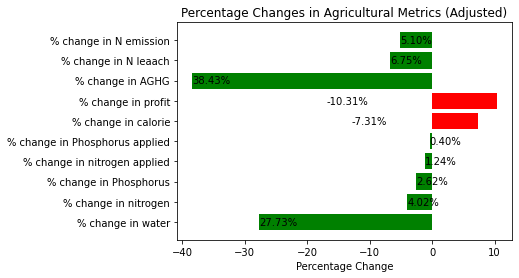

In [32]:
# Extracting the data for plotting directly from the total_data calculation results
percentage_changes = total_data[['% change in water', '% change in nitrogen', '% change in Phosphorus', 
            '% change in nitrogen applied', '% change in Phosphorus applied', 
            '% change in calorie', '% change in profit', '% change in AGHG','% change in N leaach','% change in N emission']]

# Converting Series to a dictionary for easier manipulation
percentage_changes_dict = percentage_changes.to_dict()

# Convert negative values to positive for plotting on the right side and determine color based on sign
values = [abs(value) for value in percentage_changes_dict.values()]
categories = list(percentage_changes_dict.keys())
colors = ['green' if value >= 0 else 'red' for value in percentage_changes_dict.values()]
# Adjusting the plot logic based on the new requirement:
# Positive values should be plotted on the negative side of the X-axis and vice versa.

# Determine the side of the bar based on the sign of the original value, reversing the logic
values_adjusted = [-abs(value) if value >= 0 else abs(value) for value in percentage_changes_dict.values()]

# Plotting with the adjusted logic
fig, ax = plt.subplots()
ax.barh(categories, values_adjusted, color=colors)
ax.set_xlabel('Percentage Change')
ax.set_title('Percentage Changes in Agricultural Metrics (Adjusted)')

# Annotating the bars with the actual percentage change values
for index, value in enumerate(percentage_changes_dict.values()):
    if value >= 0:
        ax.text(-value, index, f"{value:.2f}%", va='center', ha='left')
    else:
        ax.text(value, index, f"{value:.2f}%", va='center', ha='right')

plt.show()
